In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold # allowed to use cross-validation functions per the rules

### 1. Refreshing Mathematics
Let $w$ ∈ ℝ<sup>*n*</sup> be an $n$-dimensional column vector, and $f(w)$ ∈ ℝ be a function of $w$. In Lecture 2, we have defined the gradient $\nabla f(w)$ ∈ ℝ<sup>*n*</sup> and Hessian matrix $H$ ∈ ℝ<sup>*n x n*</sup> of $f$ with respect to $w$.

a) Let $f(w) = w^\top Xb$ where $X$∈ ℝ<sup>n x p</sup> is an $n×p$ matrix, and $b$ is a $p$-dimensional column vector. Compute ∇$f(w)$ using the definition of gradient.

$$
f(w) = w_1 (X_{1} b) + w_2 (X_{2} b) + \dots + w_n (X_{n} b)
$$

$$
\frac{\partial f}{\partial w_1} = X_{1} b, \quad
\frac{\partial f}{\partial w_2} = X_{2} b, \quad \dots, \quad
\frac{\partial f}{\partial w_n} = X_{n} b
$$

$$
\nabla f(w) = Xb
$$


b) Let $f(w) = \text{tr}(Bww^\top A)$ where $A, B$ ∈ ℝ<sup>nxn</sup> are squared matrices of size $n × n$, and tr($A$) is the trace of the squared matrix $A$. Using the definition of gradient, compute ∇$f(w)$.

Trace of matrix product property: $\text{tr}(XY) = \text{tr}(YX)$

So $f(w) = \text{tr}(Bww^\top A)$ rewrites to $f(w) = \text{tr}(w^\top BAw)$

Matrix differentiation rule: $\frac{\partial}{\partial w} (w^\top M w) = (M + M^\top) w$ for any square matrix $M$, $M = AB$ in our case.

$$
\nabla f(w) = \frac{\partial}{\partial w} \text{tr}(w^\top A B w)
$$

$$
\nabla f(w) = (AB + B^\top A^\top)w
$$

Since $A$ and $B$ are both square matrices, we assume that $B^\top A^\top = (AB)^\top$.

$$
\nabla f(w) = (AB + (AB)^\top)w
$$

$$
\nabla f(w) = (AB + BA)w
$$


c) Let $f(w) = \text{tr}(Bww^\top A)$. Compute the Hessian matrix $H$ of $f$ with respect to $w$ using the definition.

Hessian matrix $H$ is the second derivative of $f(w)$ with respect to $w$, which means $H = \nabla^2 f(w)$

From 1b, we've already found gradient $\nabla f(w) = (AB + BA)w$

Now we need to compute $\frac{\partial}{\partial w} \nabla f(w)$

Differentiate the gradient $\nabla f(w) = (AB + BA)w$

Since $AB + BA$ is just a constant matrix, it does not depend on w, so we take the derivative of this with respect to w resulting in
$$
H = AB + BA
$$

d) If $A = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}$ and $B = \begin{bmatrix} 2 & -1 \\ -1 & 3 \end{bmatrix}$, is $f(w)$ a convex function? (*Hint: you may use Python/Matlab/R for this question.*)

To determine if $f(w)$ is convex, we must check if the Hessian matrix is positive semidefinite, meaning all eigenvalues for the matrix are non-negative. From 1c, $H = AB + BA$

In [2]:
# Define matrices A and B
A = np.array([[1, 1], 
              [1, 2]])

B = np.array([[2, -1], 
              [-1, 3]])

# Compute H = A B + B A
H = A @ B + B @ A

# Compute eigenvalues of H
eigenvalues = np.linalg.eigvals(H)

# Check if H is positive semidefinite
is_psd = np.all(eigenvalues >= 0)

print("Hessian matrix H:")
print(H)
print("\nEigenvalues of H:")
print(eigenvalues)
print("\nIs H positive semidefinite?", is_psd)

Hessian matrix H:
[[ 2  2]
 [ 2 10]]

Eigenvalues of H:
[ 1.52786405 10.47213595]

Is H positive semidefinite? True


The Hessian matrix equated to $H = AB + BA = \begin{bmatrix} 2 & 2 \\ 2 & 10 \end{bmatrix}$

We obtained the eigenvalues for the Hessian matrix through the python code above and got 1.52786405 and 10.47213595. Both of these eigenvalues are non-negative, meaning that the Hessian matrix is positive semidefinite, which means that **$f(w)$ is convex** if $A = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}$ and $B = \begin{bmatrix} 2 & -1 \\ -1 & 3 \end{bmatrix}$.

e) In Lecture 5, we have defined the sigmoid function: $\sigma(a) = \frac{1}{1+e^{-a}}$. Let $f(w) = \log(\sigma(w^\top x))$ where $log$ is the natural logarithm function. Compute $\nabla f(w)$ using the definition of gradient.

Expanding $f(w)$:
$$
f(w) = \log \left( \frac{1}{1 + e^{-w^\top x}} \right)
$$
Need to compute the gradient:
$$
\nabla f(w) = \frac{\partial}{\partial w} \log(\sigma(w^\top x))
$$
Applying the chain rule, we first differentiate $\log(\sigma(a))$ with respect to $a$:
$$
\frac{d}{d a} \log(\sigma(a)) = \frac{1}{\sigma(a)} \cdot \sigma'(a)
$$
From the known derivative of the sigmoid function:
$$
\sigma'(a) = \sigma(a) (1 - \sigma(a))
$$
$$
\frac{d}{d a} \log(\sigma(a)) = \frac{\sigma(a) (1 - \sigma(a))}{\sigma(a)}
$$
Canceling $\sigma(a)$ in the numerator and denominator:
$$
\frac{d}{d a} \log(\sigma(a)) = 1 - \sigma(a)
$$
Since $a = w^\top x$, applying chain rule:
$$
\nabla f(w) = (1 - \sigma(w^\top x)) \cdot \frac{\partial}{\partial w} (w^\top x)
$$
Since: $\frac{\partial}{\partial w} (w^\top x) = x$, we get:
$$
\nabla f(w) = (1 - \sigma(w^\top x)) x
$$


### 2. Linear and Polynomial Regression

a) Load the training data hw1xtr.dat and hw1ytr.dat into the memory and plot it on one graph. Load the test data hw1xte.dat and hw1yte.dat into the memory and plot it on another graph.

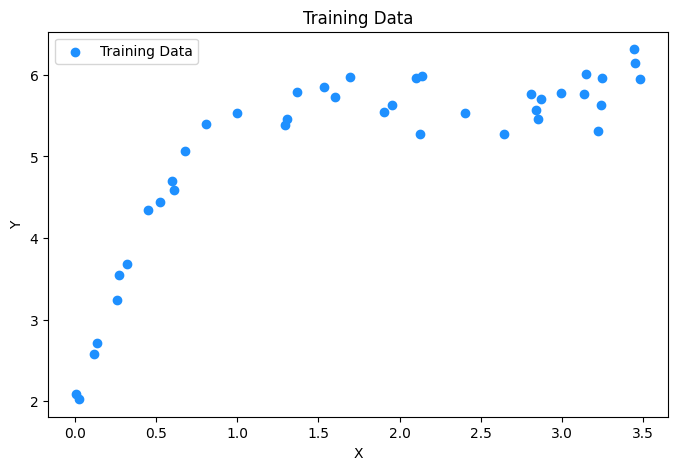

In [3]:
# Load training data hw1xtr.dat and hw1ytr.dat into the memory
trainingX = np.loadtxt("hw1xtr.dat")
trainingY = np.loadtxt("hw1ytr.dat")

# Plot training data
plt.figure(figsize=(8, 5))
plt.scatter(trainingX, trainingY, color='dodgerblue', label="Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data")
plt.legend()
plt.show()

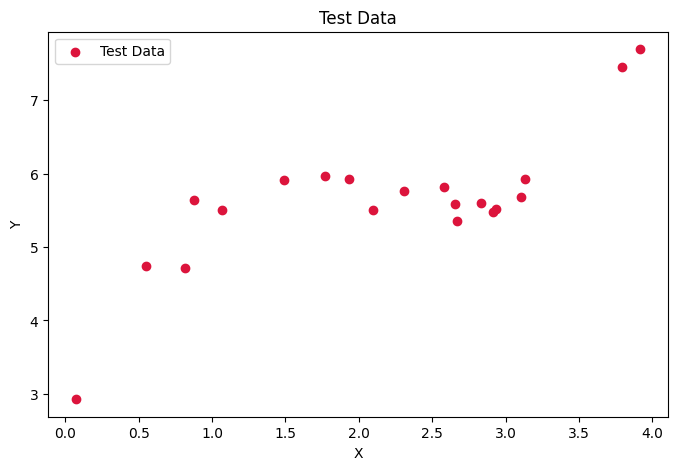

In [4]:
# Load test data hw1xte.dat and hw1yte.dat into the memory
testX = np.loadtxt("hw1xte.dat")
testY = np.loadtxt("hw1yte.dat")

# Plot test data
plt.figure(figsize=(8, 5))
plt.scatter(testX, testY, color='crimson', label="Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Test Data")
plt.legend()
plt.show()

b) Add a column vector of 1’s to the features, then use the linear regression formula discussed in Lecture 3 to obtain a 2-dimensional weight vector. Plot both the linear regression line and the training data on the same graph. Also, report the average error on the training set using Eq. (1).

$$
\text{err} = \frac{1}{m} \sum_{i=1}^{m} (w^\top x_i - y_i)^2
$$


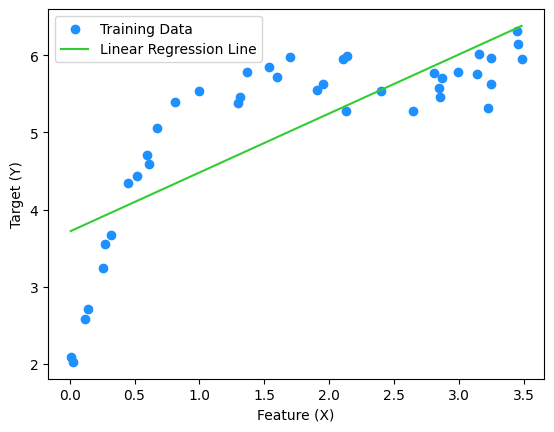

Average Error on Training Set: 0.5086


In [5]:
# Add column vector of 1's to features
X_train = np.c_[np.ones(trainingX.shape[0]), trainingX]

# Use linear regression formula to obtain 2-dimensional weight vector
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ trainingY  # (X^T * X)^(-1) * X^T * Y

# Plot linear regression line and training data on graph
plt.scatter(trainingX, trainingY, color="dodgerblue", label="Training Data")

# Generate predictions for plotting
x_vals = np.linspace(min(trainingX), max(trainingX), 100)
X_plot = np.c_[np.ones(x_vals.shape[0]), x_vals]  # Add bias term
y_vals = X_plot @ w  # Compute predictions

plt.plot(x_vals, y_vals, color="limegreen", label="Linear Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.show()

# Average error on training set using Eq. (1) (MSE)
error = (1 / trainingX.shape[0]) * np.sum((X_train @ w - trainingY) ** 2)
print(f"Average Error on Training Set: {error:.4f}")

c) Plot both the regression line and the test data on the same graph. Also report the average error on the test set using Eq. (1).

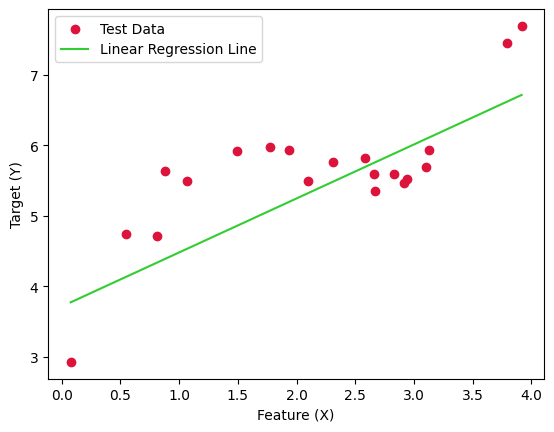

Average Error on Test Set: 0.4439


In [6]:
# Add column vector of 1's to features
X_test = np.c_[np.ones(testX.shape[0]), testX]

# Generate predictions for the test set
y_test_pred = X_test @ w  # Compute predictions using the learned weights

# Plot regression line and test data
plt.scatter(testX, testY, color="crimson", label="Test Data")

# Generate values for the regression line plot
x_vals = np.linspace(min(testX), max(testX), 100)
X_plot = np.c_[np.ones(x_vals.shape[0]), x_vals]  # Add bias term
y_vals = X_plot @ w  # Compute predictions

plt.plot(x_vals, y_vals, color="limegreen", label="Linear Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.show()

# Average error on test set using Eq. (1)
error_test = (1 / testX.shape[0]) * np.sum((X_test @ w - testY) ** 2)
print(f"Average Error on Test Set: {error_test:.4f}")

d) Implement the 2nd-order polynomial regression by adding new features x<sup>2</sup> to the inputs. Repeat (b) and (c). Compare the training error and test error. Is it a better fit than linear regression?

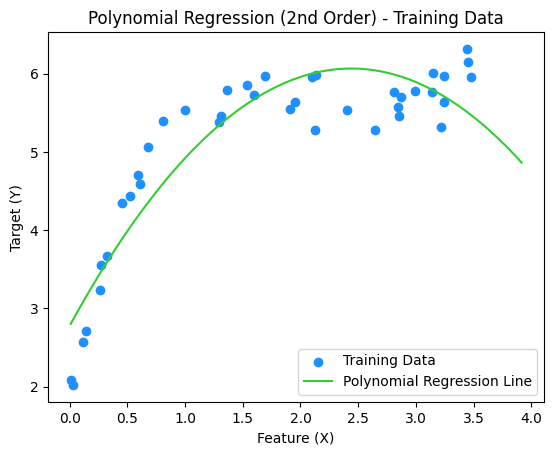

Training Error (Polynomial Regression): 0.2010


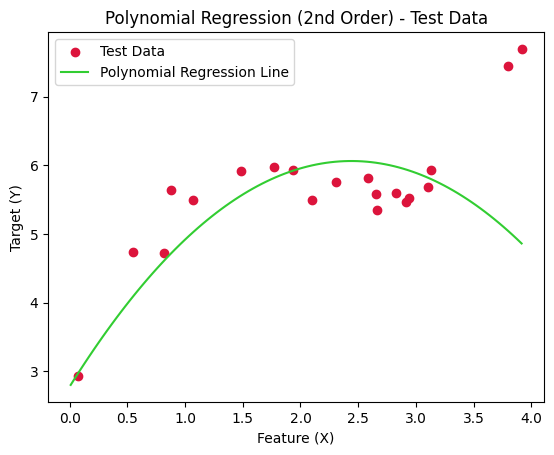

Test Error (Polynomial Regression): 0.8533

Training Error (Polynomial Regression x2): 0.2010
Test Error (Polynomial Regression x2): 0.8533


In [7]:
# 2nd-order polynomial regression
# Add x^2 as a feature to the training data
X_poly2_train = np.c_[np.ones(trainingX.shape[0]), trainingX, trainingX ** 2]  # Add x^2 feature

# Train the model with polynomial features (2nd order)
w_poly2 = np.linalg.inv(X_poly2_train.T @ X_poly2_train) @ X_poly2_train.T @ trainingY  # Normal equation

# Repeat steps from b - Plot regression line and training data for polynomial regression
plt.scatter(trainingX, trainingY, color="dodgerblue", label="Training Data")

# Generate a wider range of x values covering both training and test data
x_vals = np.linspace(min(min(trainingX), min(testX)), max(max(trainingX), max(testX)), 100)
X_poly2_plot = np.c_[np.ones(x_vals.shape[0]), x_vals, x_vals ** 2]  # Add x^2 as a feature for plotting
y_poly2_vals = X_poly2_plot @ w_poly2  # Compute predictions

plt.plot(x_vals, y_poly2_vals, color="limegreen", label="Polynomial Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title("Polynomial Regression (2nd Order) - Training Data")
plt.show()

# Repeat steps from c - Average error on training set using Eq. (1) for polynomial regression
error_poly_train = (1 / trainingX.shape[0]) * np.sum((X_poly2_train @ w_poly2 - trainingY) ** 2)
print(f"Training Error (Polynomial Regression): {error_poly_train:.4f}")

# Add x^2 as a feature to the test data
X_poly2_test = np.c_[np.ones(testX.shape[0]), testX, testX ** 2]  # Add x^2 feature

# Generate predictions for the test set using the learned weights
y_poly_test_pred = X_poly2_test @ w_poly2  # Polynomial predictions

# Plot regression line and test data for polynomial regression
plt.scatter(testX, testY, color="crimson", label="Test Data")

# Plot the polynomial regression line
plt.plot(x_vals, y_poly2_vals, color="limegreen", label="Polynomial Regression Line")

plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title("Polynomial Regression (2nd Order) - Test Data")
plt.show()

# Average error on test set using Eq. (1) for polynomial regression
error_poly_test = (1 / testX.shape[0]) * np.sum((X_poly2_test @ w_poly2 - testY) ** 2)
print(f"Test Error (Polynomial Regression): {error_poly_test:.4f}")
print()

# Compare training error and test error
print(f"Training Error (Polynomial Regression x2): {error_poly_train:.4f}")
print(f"Test Error (Polynomial Regression x2): {error_poly_test:.4f}")

Comparing the linear regression to the polynomial regression introducing new feature x<sup>2</sup> shows us that the training set fit better than the polynomial regression than the linear regression, with an error of 0.2010 as opposed to the linear regression having an error of 0.5086. However, for the test set, it fit better with the linear regression, with an error of 0.4439 as opposed to the polynomial regression error of 0.8533.

e) Implement the 3rd-order polynomial regression by adding new features x<sup>2</sup>, x<sup>3</sup> to the inputs. Repeat (b) and (c). Compare the training error and test error. Is it a better fit than linear regression and 2nd-order polynomial regression?

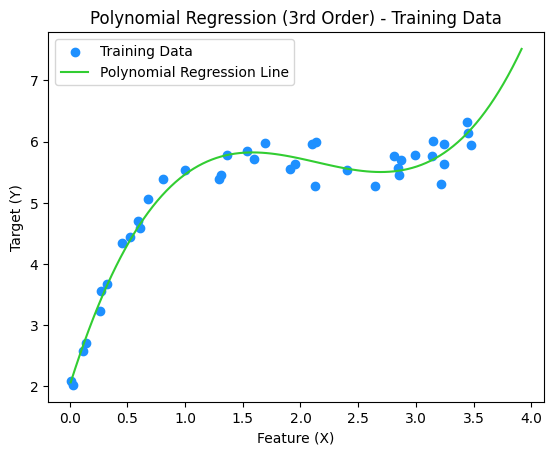

Training Error (Polynomial Regression): 0.0392


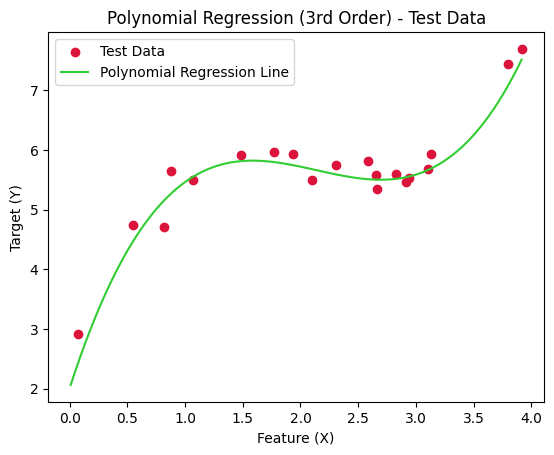

Test Error (Polynomial Regression): 0.0564

Training Error (Polynomial Regression x3): 0.0392
Test Error (Polynomial Regression x3): 0.0564


In [8]:
# 3rd-order polynomial regression
# Add x^2 and x^3 as features to the training data
X_poly3_train = np.c_[np.ones(trainingX.shape[0]), trainingX, trainingX ** 2, trainingX ** 3]  # Add x^2 and x^3 features

# Train the model with polynomial features (3rd order)
w_poly3 = np.linalg.inv(X_poly3_train.T @ X_poly3_train) @ X_poly3_train.T @ trainingY  # Normal equation

# Repeat steps from b - Plot regression line and training data for polynomial regression
plt.scatter(trainingX, trainingY, color="dodgerblue", label="Training Data")

# Generate a wider range of x values covering both training and test data
x_vals = np.linspace(min(min(trainingX), min(testX)), max(max(trainingX), max(testX)), 100)
X_poly3_plot = np.c_[np.ones(x_vals.shape[0]), x_vals, x_vals ** 2, x_vals ** 3]  # Add x^2 and x^3 as features for plotting
y_poly3_vals = X_poly3_plot @ w_poly3  # Compute predictions

plt.plot(x_vals, y_poly3_vals, color="limegreen", label="Polynomial Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title("Polynomial Regression (3rd Order) - Training Data")
plt.show()

# Repeat steps from c - Average error on training set using Eq. (1) for polynomial regression
error_poly3_train = (1 / trainingX.shape[0]) * np.sum((X_poly3_train @ w_poly3 - trainingY) ** 2)
print(f"Training Error (Polynomial Regression): {error_poly3_train:.4f}")

# Add x^2 and x^3 as features to the test data
X_poly3_test = np.c_[np.ones(testX.shape[0]), testX, testX ** 2, testX ** 3]  # Add x^2 and x^3 features

# Generate predictions for the test set using the learned weights
y_poly3_test_pred = X_poly3_test @ w_poly3  # Polynomial predictions

# Plot regression line and test data for polynomial regression
plt.scatter(testX, testY, color="crimson", label="Test Data")

# Plot the polynomial regression line
plt.plot(x_vals, y_poly3_vals, color="limegreen", label="Polynomial Regression Line")

plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title("Polynomial Regression (3rd Order) - Test Data")
plt.show()

# Average error on test set using Eq. (1) for polynomial regression
error_poly3_test = (1 / testX.shape[0]) * np.sum((X_poly3_test @ w_poly3 - testY) ** 2)
print(f"Test Error (Polynomial Regression): {error_poly3_test:.4f}")
print()

# Compare training error and test error
print(f"Training Error (Polynomial Regression x3): {error_poly3_train:.4f}")
print(f"Test Error (Polynomial Regression x3): {error_poly3_test:.4f}")


Comparing the 3rd-order polynomial regression to the linear regression and 2nd-order polynomial regression shows us that the 3rd-order polynomial is a better fit for all of the data than the 2nd-order polynomial regression and linear regression, with an error of 0.0392 for the training set error, and a test set error of 0.0564. The 3rd-order polynomial regression is the better fit for the data; better than the 2nd-order polynomial and linear regressions.

f) Implement the 4th-order polynomial regression by adding new features x2, x3, x4 to the inputs. Repeat (b) and (c). Compare the training error and test error. Compared with the previous results, which order is the best for fitting the data?

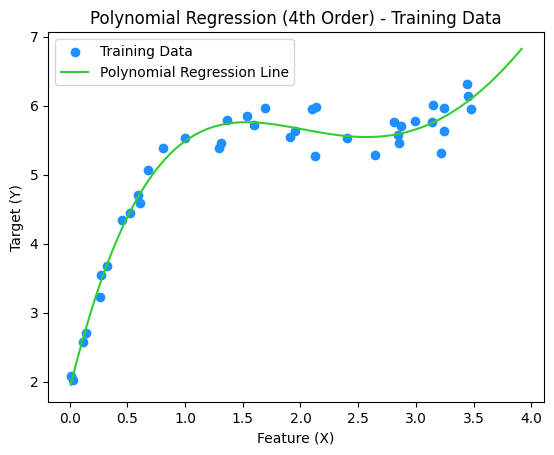

Training Error (Polynomial Regression): 0.0356


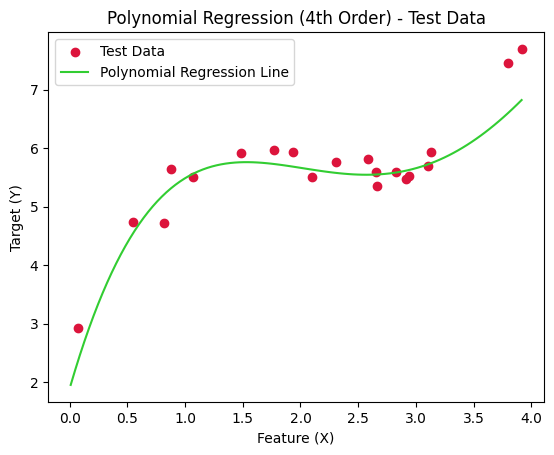

Test Error (Polynomial Regression): 0.1272

Training Error (Polynomial Regression x4): 0.0356
Test Error (Polynomial Regression x4): 0.1272


In [9]:
# 4th-order polynomial regression
# Add x^2, x^3, and x^4 as features to the training data
X_poly4_train = np.c_[np.ones(trainingX.shape[0]), trainingX, trainingX ** 2, trainingX ** 3, trainingX ** 4]  # Add x^2, x^3, x^4 features

# Train the model with polynomial features (4th order)
w_poly4 = np.linalg.inv(X_poly4_train.T @ X_poly4_train) @ X_poly4_train.T @ trainingY  # Normal equation

# Repeat steps from b - Plot regression line and training data for polynomial regression
plt.scatter(trainingX, trainingY, color="dodgerblue", label="Training Data")

# Generate a wider range of x values covering both training and test data
x_vals = np.linspace(min(min(trainingX), min(testX)), max(max(trainingX), max(testX)), 100)
X_poly4_plot = np.c_[np.ones(x_vals.shape[0]), x_vals, x_vals ** 2, x_vals ** 3, x_vals ** 4]  # Add x^2, x^3, x^4 as features for plotting
y_poly4_vals = X_poly4_plot @ w_poly4  # Compute predictions

plt.plot(x_vals, y_poly4_vals, color="limegreen", label="Polynomial Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title("Polynomial Regression (4th Order) - Training Data")
plt.show()

# Repeat steps from c - Average error on training set using Eq. (1) for polynomial regression
error_poly4_train = (1 / trainingX.shape[0]) * np.sum((X_poly4_train @ w_poly4 - trainingY) ** 2)
print(f"Training Error (Polynomial Regression): {error_poly4_train:.4f}")

# Add x^2, x^3, and x^4 as features to the test data
X_poly4_test = np.c_[np.ones(testX.shape[0]), testX, testX ** 2, testX ** 3, testX ** 4]  # Add x^2, x^3, x^4 features

# Generate predictions for the test set using the learned weights
y_poly4_test_pred = X_poly4_test @ w_poly4  # Polynomial predictions

# Plot regression line and test data for polynomial regression
plt.scatter(testX, testY, color="crimson", label="Test Data")

# Plot the polynomial regression line
plt.plot(x_vals, y_poly4_vals, color="limegreen", label="Polynomial Regression Line")

plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title("Polynomial Regression (4th Order) - Test Data")
plt.show()

# Average error on test set using Eq. (1) for polynomial regression
error_poly4_test = (1 / testX.shape[0]) * np.sum((X_poly4_test @ w_poly4 - testY) ** 2)
print(f"Test Error (Polynomial Regression): {error_poly4_test:.4f}")
print()

# Compare training error and test error
print(f"Training Error (Polynomial Regression x4): {error_poly4_train:.4f}")
print(f"Test Error (Polynomial Regression x4): {error_poly4_test:.4f}")


Compared to previous results, the 4th-order polyonomial regression performs slightly better than 3rd-order for the training set with an error of 0.0356, as opposed to the 3rd order's 0.0392. However, the test set error for the 4th-order is 0.1272, which is worse than the 3rd-order polynomial regression error of 0.0564. This means, 4th-order polynomial regression is best for the training set, whereas the 3rd-order polynomial regression is best for the test set.

### 3. Regularization and Cross-Validation

In [10]:
# Define lambda values to test
lambdas = [0.01, 0.1, 1, 10, 100, 1000]
training_errors = []
test_errors = []

a) Using the training data to implement ℓ<sub>2</sub>-regularized for the 4th-order polynomial regression (page 12 of Lecture 4, note that we do not penalize the bias term w<sub>0</sub>), vary the regularization parameter λ ∈ {0.01, 0.1, 1, 10, 100, 1000}. Plot the training and test error (averaged over all instances) using Eq. (1) as a function of λ (you should use a log10 scale for λ). Which λ is the best for fitting the data?


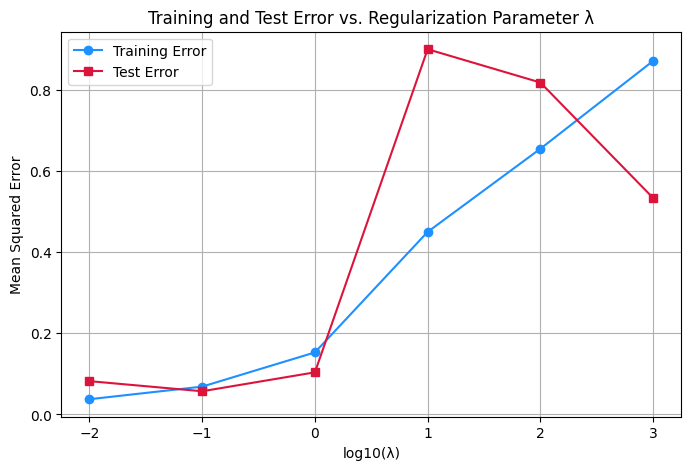

Best λ for fitting the data: 0.1


In [11]:
# Manually construct polynomial feature matrices
X_poly4_train = np.c_[np.ones(trainingX.shape[0]), trainingX, trainingX**2, trainingX**3, trainingX**4]
X_poly4_test = np.c_[np.ones(testX.shape[0]), testX, testX**2, testX**3, testX**4]

for λ in lambdas:
    # Construct regularization matrix
    reg_matrix = np.eye(X_poly4_train.shape[1])  
    reg_matrix[0, 0] = 0

    # Compute weights using the regularized normal equation
    w_poly4_reg = np.linalg.inv(X_poly4_train.T @ X_poly4_train + λ * reg_matrix) @ X_poly4_train.T @ trainingY

    # Compute MSE for training data
    error_train = np.mean((X_poly4_train @ w_poly4_reg - trainingY) ** 2)
    training_errors.append(error_train)

    # Compute MSE for test data
    error_test = np.mean((X_poly4_test @ w_poly4_reg - testY) ** 2)
    test_errors.append(error_test)

# Plot training and test errors vs. log10(λ)
plt.figure(figsize=(8, 5))
plt.plot(np.log10(lambdas), training_errors, label="Training Error", marker='o', color="dodgerblue")
plt.plot(np.log10(lambdas), test_errors, label="Test Error", marker='s', color="crimson")

plt.xlabel("log10(λ)")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Error vs. Regularization Parameter λ")
plt.legend()
plt.grid(True)
plt.show()

# Find best λ
best_lambda = lambdas[np.argmin(test_errors)]
print(f"Best λ for fitting the data: {best_lambda}")

b) Plot the value of each weight parameter (including the bias term w0) as a function of λ.

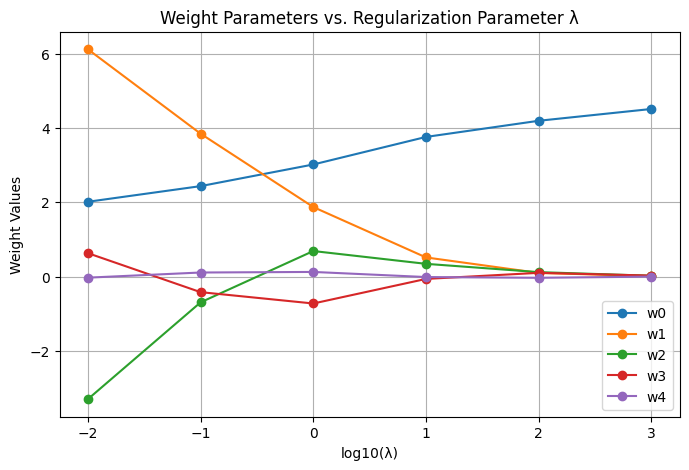

In [12]:
# Store weights for each λ
weights = []

for λ in lambdas:
    # Construct regularization matrix
    reg_matrix = np.eye(X_poly4_train.shape[1])  
    reg_matrix[0, 0] = 0

    # Compute weights using the regularized normal equation
    w_poly4_reg = np.linalg.inv(X_poly4_train.T @ X_poly4_train + λ * reg_matrix) @ X_poly4_train.T @ trainingY
    
    # Store the weights
    weights.append(w_poly4_reg)

# Convert to NumPy array for plotting
weights = np.array(weights)

# Plot each weight parameter as a function of log10(λ)
plt.figure(figsize=(8, 5))
for i in range(weights.shape[1]):
    plt.plot(np.log10(lambdas), weights[:, i], marker='o', label=f"w{i}")

plt.xlabel("log10(λ)")
plt.ylabel("Weight Values")
plt.title("Weight Parameters vs. Regularization Parameter λ")
plt.legend()
plt.grid(True)
plt.show()


c) Write a procedure that performs five-fold cross-validation on your training data (page 7 of Lecture 4). Use it to determine the best value for λ. Show the average error on the validation set as a function of λ. Is the same as the best λ in (a)? For the best fit, plot the test data and the ℓ<sub>2</sub>-regularized 4th-order polynomial regression line obtained.

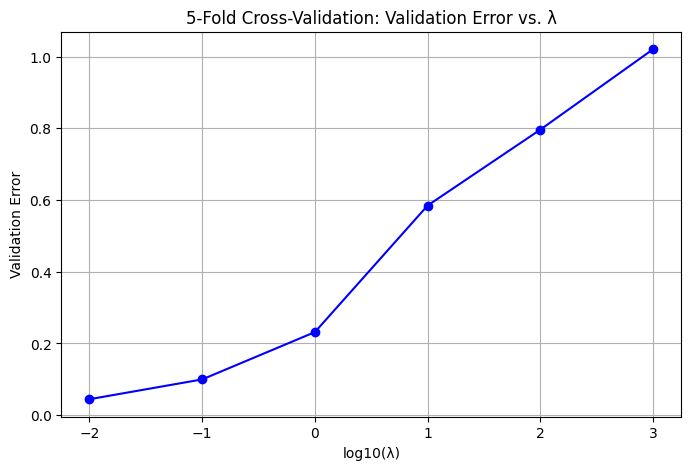

Best λ from cross-validation: 0.01


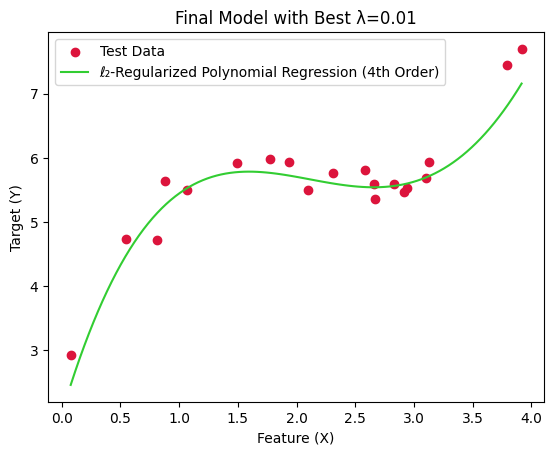

In [13]:
# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store average validation errors for each λ
val_errors = []

for λ in lambdas:
    fold_errors = []
    
    for train_idx, val_idx in kf.split(trainingX):
        # Split training data into new training and validation sets
        X_train, X_val = trainingX[train_idx], trainingX[val_idx]
        Y_train, Y_val = trainingY[train_idx], trainingY[val_idx]
        
        # Add polynomial features
        X_poly4_train = np.c_[np.ones(X_train.shape[0]), X_train, X_train**2, X_train**3, X_train**4]
        X_poly4_val = np.c_[np.ones(X_val.shape[0]), X_val, X_val**2, X_val**3, X_val**4]
        
        # Regularization matrix
        reg_matrix = np.eye(X_poly4_train.shape[1])
        reg_matrix[0, 0] = 0
        
        # Compute weights using the regularized normal equation
        w_poly4_reg = np.linalg.inv(X_poly4_train.T @ X_poly4_train + λ * reg_matrix) @ X_poly4_train.T @ Y_train
        
        # Compute validation error
        val_error = (1 / X_val.shape[0]) * np.sum((X_poly4_val @ w_poly4_reg - Y_val) ** 2)
        fold_errors.append(val_error)
    
    # Store the average validation error across the 5 folds
    val_errors.append(np.mean(fold_errors))

# Convert errors to numpy array for plotting
val_errors = np.array(val_errors)

# Plot validation error vs. log10(λ)
plt.figure(figsize=(8, 5))
plt.plot(np.log10(lambdas), val_errors, marker='o', linestyle='-', color='b')
plt.xlabel("log10(λ)")
plt.ylabel("Validation Error")
plt.title("5-Fold Cross-Validation: Validation Error vs. λ")
plt.grid(True)
plt.show()

# Determine the best λ
best_lambda = lambdas[np.argmin(val_errors)]
print(f"Best λ from cross-validation: {best_lambda}")

# Re-train model using best λ on full training data
X_poly4_train = np.c_[np.ones(trainingX.shape[0]), trainingX, trainingX**2, trainingX**3, trainingX**4]
X_poly4_test = np.c_[np.ones(testX.shape[0]), testX, testX**2, testX**3, testX**4]

# Regularization matrix
reg_matrix = np.eye(X_poly4_train.shape[1])
reg_matrix[0, 0] = 0

# Compute final model weights
w_best = np.linalg.inv(X_poly4_train.T @ X_poly4_train + best_lambda * reg_matrix) @ X_poly4_train.T @ trainingY

# Generate predictions
y_test_pred = X_poly4_test @ w_best
x_vals = np.linspace(min(testX), max(testX), 100)
X_poly4_plot = np.c_[np.ones(x_vals.shape[0]), x_vals, x_vals**2, x_vals**3, x_vals**4]
y_poly4_vals = X_poly4_plot @ w_best

# Plot test data and regression line
plt.scatter(testX, testY, color="crimson", label="Test Data")
plt.plot(x_vals, y_poly4_vals, color="limegreen", label="ℓ₂-Regularized Polynomial Regression (4th Order)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title(f"Final Model with Best λ={best_lambda}")
plt.show()
